<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/Part2_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non Linear Functions

In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

# Generate training data
def function1():
  x = np.linspace(-2 * np.pi, 2 * np.pi, 2000)
  y =  2*np.sin(np.pi * x) - 2
  return x,y


Converting into Pytorch Tensor


In [59]:
# Convert to PyTorch tensors
def convertToTensors(x,y):
  x_tensor = torch.from_numpy(x).float().unsqueeze(1)
  y_tensor = torch.from_numpy(y).float().unsqueeze(1)
  return x_tensor,y_tensor

Shallow Neural Network

In [61]:
# summary(modelShallow,(1,))

In [62]:

# model2 = DNN2()
class DNN2(torch.nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = torch.nn.Linear(1, 32)
        self.fc2 = torch.nn.Linear(32, 64)
        self.fc3 = torch.nn.Linear(64, 32)
        self.fc4 = torch.nn.Linear(32, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model2 = DNN2()
total_params2 = sum(p.numel() for p in model2.parameters())
print("Number of parameters in the above DNN model : ", total_params2)



Number of parameters in the above DNN model :  4289


In [63]:
# model2.to('cuda')
summary(model2,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 64]           2,112
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
              ReLU-6                   [-1, 32]               0
            Linear-7                    [-1, 1]              33
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [65]:
# summary(model3,(1,))

Loss Function and Training the model



In [68]:
x2,y2 = function1()
x_tensor2,y_tensor2 = convertToTensors(x2,y2)
model2 = DNN2()
# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

# Define the training loop
training_losses = []
training_accuracies = []
grad_array = []
for epoch in range(400):
    loss_iter = 0.0
    total_diff = 0.0
  # for i, (x, y) in enumerate(zip(x2, y2), 0):
    optimizer.zero_grad()
    y_pred2 = model2(x_tensor2)
    loss = criterion(y_pred2, y_tensor2)
    loss.backward()
    optimizer.step()

    loss_iter += loss.item()
    # total_diff += abs(y_pred2.item() - y_tensor2.item())

    training_losses.append(loss_iter / len(x2))

    # grad_all = 0.0
    # for p in model2.parameters():
    #   grad = 0.0
    #   if p.grad is not None:
    #     grad = (p.grad.cpu().data.numpy() ** 2).sum()
    #   grad_all += grad
    # grad_norm = grad_all ** 0.5
    # grad_array.append(grad_norm)


    # Get gradient norm (From slides)
    gradAll = 0.0
    for p in model2.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        gradAll += grad
    gradNorm = gradAll ** 0.5
    grad_array.append(gradNorm)

    # training_accuracies.append(1 - total_diff / len(x2))
    if(epoch%100==0):
      print('Epoch: %d Loss: %.3f ' % (epoch + 1, training_losses[-1])) # training_accuracies[-1]))


Epoch: 1 Loss: 0.003 
Epoch: 101 Loss: 0.001 
Epoch: 201 Loss: 0.001 
Epoch: 301 Loss: 0.001 


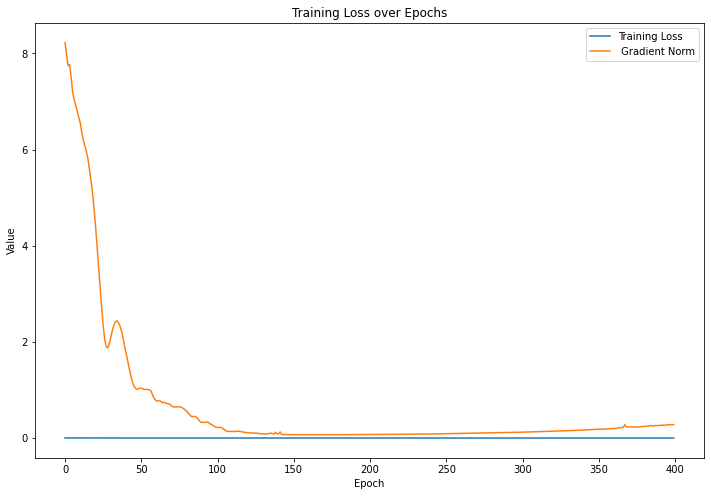

In [69]:

# Plot the training loss and accuracy
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(training_losses, Label= 'Training Loss')
ax.plot(grad_array, Label = ' Gradient Norm')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# plt.plot(training_accuracies)
# plt.xlabel('Epoch')
# plt.ylabel('Training Accuracy')
# plt.title('Training Accuracy over Epochs')
# plt.show()

In [70]:
grad_array[-1]

0.27872427706784275